In [ ]:
# USAGE
# python train_denoising_autoencoder.py

# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")

# import the necessary packages
from convautoencoder import ConvAutoencoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2

# initialize the number of epochs to train for and batch size
EPOCHS = 10
BS = 32

# load the MNIST dataset
print("[INFO] loading MNIST dataset...")
((trainX, _), (testX, _)) = mnist.load_data()

# add a channel dimension to every image in the dataset, then scale
# the pixel intensities to the range [0, 1]
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

# sample noise from a gaussian distribution
mean = 0
var = 0.1
sigma = var**0.5
traingauss = np.random.normal(mean,sigma,trainX.shape)
traingauss = traingauss.reshape(trainX.shape)
trainXNoisy = trainX + traingauss
testgauss = np.random.normal(mean,sigma,testX.shape)
testgauss = testgauss.reshape(testX.shape)
testXNoisy = testX + testgauss





[INFO] loading MNIST dataset...


In [ ]:
# construct our convolutional autoencoder
print("[INFO] building autoencoder...")
(encoder, decoder, autoencoder) = ConvAutoencoder.build(28, 28, 1)
opt = Adam(lr=1e-3)
autoencoder.compile(loss="mse", optimizer=opt)

# train the convolutional autoencoder
H = autoencoder.fit(
	trainXNoisy, trainX,
	validation_data=(testXNoisy, testX),
	epochs=EPOCHS,
	batch_size=BS)

# construct a plot that plots and saves the training history
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

[INFO] building autoencoder...
Epoch 1/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0219 - val_loss: 0.0150
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0131 - val_loss: 0.0122
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0120 - val_loss: 0.0117
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0110 - val_loss: 0.0109
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0107 - val_loss: 0.0105
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0105 - val_loss: 0.0106
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0103 - val_loss: 0.0105
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0101 - val_loss: 0.0104
Epoch 10/10
1875/1875 [===================

[INFO] making predictions...


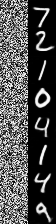

In [ ]:
# use the convolutional autoencoder to make predictions on the
# testing images, then initialize our list of output images
print("[INFO] making predictions...")
decoded = autoencoder.predict(testXNoisy)
outputs = None

# loop over our number of output samples
for i in range(0,8):
	# grab the original image and reconstructed image
	original = (testXNoisy[i] * 255).astype("uint8")
	recon = (decoded[i] * 255).astype("uint8")

	# stack the original and reconstructed image side-by-side
	output = np.hstack([original, recon])

	# if the outputs array is empty, initialize it as the current
	# side-by-side image display
	if outputs is None:
		outputs = output

	# otherwise, vertically stack the outputs
	else:
		outputs = np.vstack([outputs, output])

from google.colab.patches import cv2_imshow
cv2_imshow(outputs)